# [Math is Money](https://www.youtube.com/watch?v=uyHanXCGmsM), And Money Is Math

by Casey Durfee    
Copyright 2025

In [1]:
import numpy as np
rng = np.random.default_rng(2718)
np.random.seed(2718)

import matplotlib.pyplot as plt
import pandas as pd
import texttable
import scipy


## Two Kinds of People
Lots of sportsbooks publish info on how much "action" they've gotten on each side.

Here's DraftKings':  https://dknetwork.draftkings.com/draftkings-sportsbook-betting-splits/

It's a smart move. It's good for SEO. And I'm sure they get a lot of people who decide to take bets from that page. 

For example, the Pacers are playing Brooklyn tonight. 27% of the bets are on Brooklyn at +10.5. 73% are on Pacers -10.5. 

Somebody who sees that and decides to make a bet based on that information could bet either way. They could either tell themselves, "Everybody's taking the Pacers, so it must be a good bet" or "everybody's taking the Pacers, so it must be a bad bet". 

What are those two groups like when they're not betting on basketball, do you think? Do they use the same kind of toothpaste? Watch the same kind of TV shows? Vote for the same political parties?

I saw someone online the other day saying a game was a "massive upset" because a team that was favored by 12 points only won by 3 points. How is that an upset? The favored team still won! Sure, they lost against the spread, but the athletes shouldn't know or care about that. The only thing that got upset was this gambler's feelings, because reality didn't conform to the scenario that was easiest for him to imagine. How many bets are placed due to lack of imagination?

In theory, both sides of the bet have an equal chance of winning, and it's a binary outcome. If there are only two outcomes and they have roughly equal probability, then nothing can be all that surprising. If it's not a win, it's a loss, by definition. 

I get that a team losing by 9 to the spread is more surprising than them losing by 3 to the spread. Though as far as heartbreak goes, maybe losing by one to the spread is worse.

[TODO: this isn't good enough]

The further the line is from the final outcome, the more surprising. But it shouldn't be much more surprising than the other direction -- beating the spread by 9 points. One direction is a "massive upset", the other isn't. I have a hunch Massive Upset Guy would take the Pacers.


### Information Inspiration
Let's say you're tracking a statistic and calculating the running average after every day. Maybe it's a new online business and it's sales per day.

Each day's result could change the average by a huge margin. Say the list is [1,3,8,7,1000,4]. When you get to 1000, the average is going to go way up, right? 

Until we got to 1000, we'd have no way of assuming that numbers on the list could be that big. Imagine you were plotting the results on a piece of paper day by day. You're gonna have to redo the whole thing. The potential scale is way different now. This new piece of information told us that the statistic might have a higher mean and a much wider spread than we could have imagined up to that point.

Now imagine you're adding up a bunch of 1's and 0's, like [0,1,1,0,1,0]. If you've got binary outcomes, each result only matters a bit, figuratively and literally. It can't affect the mean or variance much. If you think about it, no one bit can be *crazy* enough to affect the variance on its own. Only the rate of success and the number of trials should affect the variance.

Maybe this represents days you went to the gym. You could mark these on a calendar, X out the days that you go. You're never going to have a crazy result that causes you to buy a new calendar with 1000 days in the month. And the winning percentage isn't going to change by that much after a while. There's only so much it can change at a time.

Intuitively, we get even less "real" info per bit of information if the probability of the outcome is greater than .5. If the probability is .99, we're seeing 99 "1"s for every 1 "0". The single 0 is surprising, and conveys a lot of information, while each of the 99 1's is almost totally unsurprising.

### Signal vs. Noise

There's a whole branch of math called Information Theory that covers how this digital "surprise" works. A good example is file compression, like ZIP files. How small can you shrink the size of a file? Not down to zero, obviously. It turns out some files can't be compressed at all! (There are more files of length $ 2^{n}$ than there are of lengths $1..2^{n-1}$).

What if the file is just random noise? there's no way to extract any general rules from it to make the representation smaller. Imagine we replaced every unique word in this document with a number. So "the" is 1, "a", is 2, etc. We could definitely make the document smaller, because there are patterns to English language. Long words like "distribution" or "figuratively" get turned into at most 4 digit numbers. We can get the original text back by reversing the process.

There's no structure to randomness. You can't make generalizations from it. You can fit a model to random data, but it's going to be useless at predicting anything else. At best, it can find spurious trends and memorize randomness.

The betting record of a bad bettor achieves a similar result as far as winning percentage, but is not a result of a random process. Taking all favorites, and prop bet overs, isn't random.

If you just have their picks, I don't know you could distinguish between the bad bettor and some coin flips. But with extra context, there would certainly be patterns. Maybe they always take the Knicks or something. But they would be crap rules, with no value for predicting the future. There's no point in trying to learn from random noise.

## There's a Hole in My Phone Where the Money Goes

One bit of gambling lore is that there are "public" teams that get bet on more frequently, regardless of the line. Like, your cousin who's a Cowboys fan is going to bet the Cowboys on Thanksgiving regardless of whether it's a fair line or not.  He'd watch the game and root for the Cowboys anyway, but it's a little more fun that way. The Cowboys aren't just a random number generator to him.

I decided to scrape data from [sportsbookreview](https://www.sportsbookreview.com/betting-odds/nba-basketball/) (SBR). I don't know where they get the betting percentages from. Their numbers seemed to indicate more "action" overall than a couple other sources I found -- the betting percentages were closer together. Other sites had games where there's 10% action on one side and 90% on the other, which seems implausible on a large volume of bets.

These numbers are as of Feb 5, 2025. Unfortunately, there is about a week of data missing around Thanksgiving.

Who are the public teams in the NBA this season, according to the SBR data?

In [2]:
import scrape_sbr

In [3]:
money_data = scrape_sbr.money_vs_ats()
game_data = scrape_sbr.clean_data()

missing scores from 13 games
missing scores from 13 games


These are the top 10 teams over the course of the whole season.

In [4]:
money_data['money_percents'].sort_values(ascending=False)[:10]

Cleveland        117.5
Denver           116.5
Memphis          115.5
Dallas           111.0
Milwaukee        111.0
Golden State     111.0
Indiana          109.0
Oklahoma City    108.0
Brooklyn         108.0
Minnesota        106.0
Name: money_percents, dtype: float64

These are mostly teams that have been good in the past few years, plus Cleveland, this year's standout team. There aren't any obvious "public" teams on this list except maybe Golden State. No LA Lakers. No New York Knicks.

### Ugly dogs
Here are the bottom 10: 

In [5]:
money_data['money_percents'].sort_values(ascending=True)[:10]

New Orleans      75.5
Charlotte        80.5
Miami            81.0
Utah             82.0
Portland         86.0
Philadelphia     87.5
L.A. Clippers    91.0
Orlando          93.5
Boston           94.5
Detroit          95.5
Name: money_percents, dtype: float64

As a fan, the bottom 10 mostly makes sense to me. A lot of these teams are kinda disasters, brought down by injury or incompetence, or both. There are a few fun teams sprinkled in here -- Portland, LA Clippers, Detroit -- but the rest have been kind of sad.

But if the lines are even, there should be equal opportunity on these "trash" teams. [TODO: expand/transfer existing]


Every team should have close to a .500 record against the spread. Let's see if there's any connection between records against the spread and betting percentages.

In [6]:
money_vs_ats = scrape_sbr.money_vs_ats()
money_vs_ats.sort_values('ats_win_pct')

missing scores from 13 games


,winner,loser,ats_win_pct,money_percents
Phoenix,15,31,0.326087,103.0
Minnesota,17,29,0.369565,106.0
Philadelphia,18,28,0.391304,87.5
Miami,17,26,0.395349,81.0
Washington,19,28,0.404255,101.0
Atlanta,19,27,0.413043,103.0
Sacramento,19,27,0.413043,102.0
Boston,20,27,0.425532,94.5
New Orleans,20,27,0.425532,75.5
Chicago,22,27,0.448980,96.0


<Axes: >

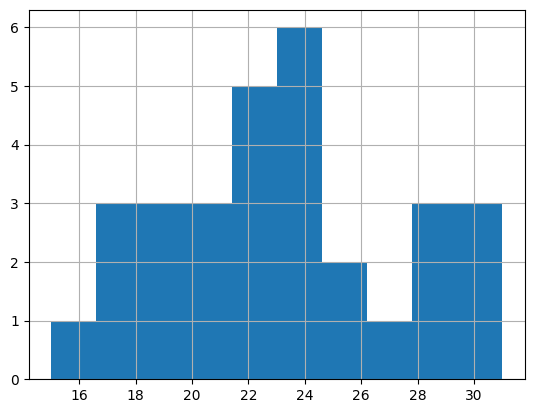

In [7]:
money_vs_ats.winner.hist()

In [13]:
money_vs_ats.winner.min()

np.int64(15)

In [15]:
money_vs_ats.winner.max()

np.int64(31)

Is 31-15 a plausible record? Why can't Vegas seem to get Memphis right? Toronto and Portland are kinda bad teams. Is Vegas just underestimating them?

I started off talking about randomness because if you have enough data, there will be patterns. There's a whole branch of mathematics called [Ramsey Theory](https://en.wikipedia.org/wiki/Ramsey_theory) that deals with these types of patterns. Yep, it's the Len Bias of math again.

[TODO improve this prose]

Some of the variation in record is due to small sample size.  How about a quick simulation? Time for our buddy, the binomial distribution, to pop up again. 

<Axes: >

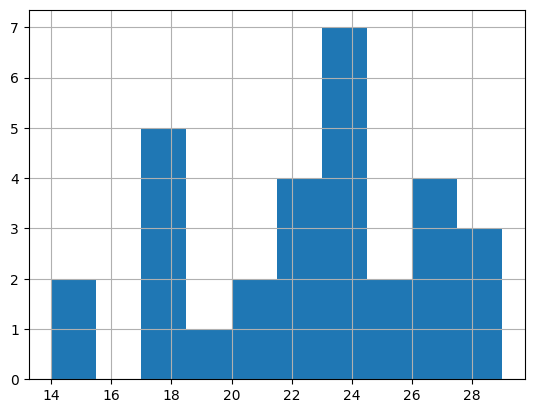

In [8]:
GAMES_IN_SEASON = 46 # so far

team_names = money_vs_ats.index
win_counts = []
for t in team_names:
    team_wins = scipy.stats.binom.rvs(GAMES_IN_SEASON, .5)
    win_counts.append(team_wins)

win_counts_series = pd.Series(win_counts)
win_counts_series.hist()

In [10]:
win_counts_series.min()

np.int64(14)

In [11]:
win_counts_series.max()

np.int64(29)

the simulated data gives win totals against the spread ranging from 14-29. the real data ranges from 15 to 31. So it's a similar range of values. Memphis being 31-15 and Phoenix being 15-31 are plausible solely due to randomness, not due to Vegas having a bias or something. The number of wins against the spread should follow a binomial distribution with p=0.5, which has a wider spread than we might assume.

TODO: figure out how much of the project DEMAR stuff I want to keep.